In [1]:
#import packages 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
lsoa = gpd.read_file('1_raw data\Census and admin boundaries\Lower_layer_Super_Output_Areas_2021_EW_BGC_V3_-3320468682147951291.geojson')
lsoa

,FID,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E01000001,City of London 001A,532123,181632,-0.097140,51.51816,1a259a13-a525-4858-9cb0-e4952ba01af6,"POLYGON ((532105.312 182010.574, 532162.491 18..."
1,2,E01000002,City of London 001B,532480,181715,-0.091970,51.51882,1233e433-0b0d-4807-8117-17a83c23960d,"POLYGON ((532634.497 181926.016, 532619.141 18..."
2,3,E01000003,City of London 001C,532239,182033,-0.095320,51.52174,5163b7cb-4ffe-4f41-95b9-aa6cfc0508a3,"POLYGON ((532135.138 182198.131, 532158.25 182..."
3,4,E01000005,City of London 001E,533581,181283,-0.076270,51.51468,2af8015e-386e-456d-a45a-d0a223c340df,"POLYGON ((533808.018 180767.774, 533649.037 18..."
4,5,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.53875,b492b45e-175e-4e77-b0b5-5b2fd6993ef4,"POLYGON ((545122.049 184314.931, 545271.849 18..."
...,...,...,...,...,...,...,...,...,...
35667,35668,W01002036,Vale of Glamorgan 005G,317939,172435,-3.182170,51.44493,a5653c36-55a1-401d-8165-f8eaa2d8c258,"POLYGON ((317734.974 172707.277, 317873.187 17..."
35668,35669,W01002037,Vale of Glamorgan 005H,318527,172406,-3.173710,51.44476,50989a4b-683d-4bfb-88eb-eb065f77bc25,"POLYGON ((319033.579 172604.209, 319009.058 17..."
35669,35670,W01002038,Vale of Glamorgan 014G,306491,167360,-3.345520,51.39753,5d44e7ea-ea83-4556-86ff-b40df05d7ea8,"POLYGON ((306385 168776, 306363 168614, 306618..."
35670,35671,W01002039,Vale of Glamorgan 014H,306564,166023,-3.344110,51.38553,931b3ca2-0b2f-4bfa-85ec-055cee49d2ed,"POLYGON ((306820.271 166519.139, 306844.281 16..."


,FID,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
10039,10040,E01010568,Bradford 016A,416258,438952,-1.75437,53.84657,e88407c7-9e25-4f91-80c6-5d50b1983f2e,"POLYGON ((416422.17 439366.289, 416475.128 439..."
10040,10041,E01010569,Bradford 016B,414693,438453,-1.77818,53.84213,6def46a8-5867-4fed-b993-ecbff7541346,"POLYGON ((415371.559 439225.549, 415417.28 439..."
10041,10042,E01010570,Bradford 018A,413992,438990,-1.78881,53.84697,25218d8d-f7ac-4786-9a6f-29812b350fc0,"POLYGON ((413955.24 439413.594, 414146.534 439..."
10042,10043,E01010571,Bradford 016C,415223,438398,-1.77013,53.84162,90721da5-8f0b-4301-a945-c6672b129f6d,"POLYGON ((415809.999 438803.797, 415760.976 43..."
10043,10044,E01010572,Bradford 016D,415428,438857,-1.76699,53.84574,ad06bf87-5d3a-4b5e-b928-0834cd1c3a24,"POLYGON ((415579.831 439222.99, 415712.76 4391..."


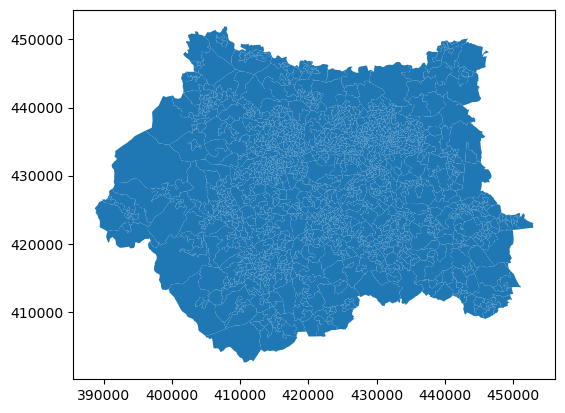

In [3]:
wys = ['Calderdale', 'Leeds', 'Bradford', 'Kirklees', 'Wakefield']
wys_lsoa = lsoa[lsoa.LSOA21NM.str.contains('|'.join(wys))]

wys_lsoa.plot()
wys_lsoa.head()

<Axes: >

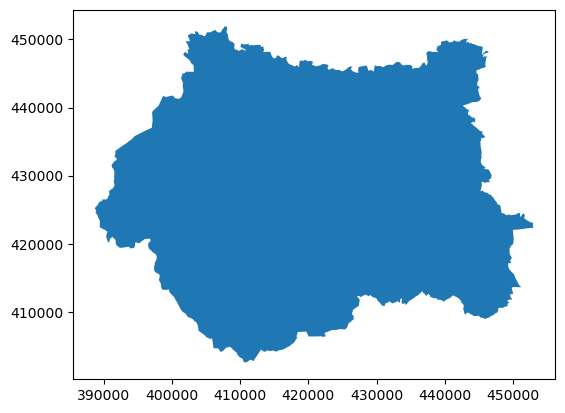

In [4]:
wys_bound = wys_lsoa
wys_bound['temp'] = 1
wys_bound = wys_bound.dissolve(by='temp')
wys_bound.plot()

In [5]:
# load Output Areas' Population Weighed Centroids 
oapwc = gpd.read_file('1_raw data\Census and admin boundaries\Output_Areas_2021_PWC_V3_-2091752234720525558.geojson')


In [6]:
wys_oapwc = gpd.clip(oapwc, wys_bound)
wys_oapwc.head()

,FID,OA21CD,GlobalID,geometry
72280,72281,E00059464,7af45239-996b-40f3-86f3-9d4f5551d9b6,POINT (440218.824 412259.839)
65491,65492,E00059837,3f6521e2-6c7d-4e0c-b886-9623ffae7269,POINT (442767.31 412321.243)
62603,62604,E00059455,832c1867-019b-414e-a826-b4b48107b37c,POINT (443398.375 412396.37)
71239,71240,E00059456,db33e155-38a1-4091-a310-91c9a8ffc53e,POINT (443016.717 412468.809)
72194,72195,E00059836,4c4f130a-5c64-474c-8a04-57ce84a5ed9e,POINT (442472.175 412482.558)


In [7]:
wys_oapwc = wys_oapwc.drop(['GlobalID', 'FID'], axis=1)
wys_oapwc.head()

,OA21CD,geometry
72280,E00059464,POINT (440218.824 412259.839)
65491,E00059837,POINT (442767.31 412321.243)
62603,E00059455,POINT (443398.375 412396.37)
71239,E00059456,POINT (443016.717 412468.809)
72194,E00059836,POINT (442472.175 412482.558)


## Travel time to FS charities

In [10]:
wys_charity = pd.read_csv('2_processed data\FS CSVs\FS_West Yorkshire Charities.csv', encoding = "ISO-8859-1")
wys_charity.head()

,Nature of Organisation,Charity,Food Moved KG,Food Moved Meal Equivalents,CFMs Served,CFM Beneficiaries,Value of food (£),allocationpostcode,ONS Postcode Lookup.lat,ONS Postcode Lookup.long,Primary_Beneficiary_Group_Mapped,member_id
0,Community centre,St Catherines Church & Centre,18189.06,43308.15186,1,115,"74,998.09",WF1 5HL,53.670867,-1.480870,Homeless people & rough sleepers,119
1,Day centre / Drop in centre,The Life Centre,10786.83,25683.44223,1,115,"48,237.93",BD4 6BU,53.764742,-1.730456,The local community,121
2,Day centre / Drop in centre,Trinity Mission Castleford CIO,16823.96,40057.84876,1,115,"68,025.44",WF10 1DZ,53.725007,-1.354036,People with drug or alcohol addiction,122
3,Food service only,Hamara Hlc,14556.57,34659.19317,1,115,"49,729.98",LS11 6RD,53.772544,-1.550580,Asylum seekers & refugees,570
4,Food service only,LWSS Council support Hubs,14471.32,34456.21292,1,115,"41,700.72",LS9 0NP,53.783194,-1.502891,NaN,574


In [11]:
#creat a geodataframe for charities
from shapely.geometry import Point
wys_charity['Coordinates'] = list(zip(wys_charity['ONS Postcode Lookup.long'], wys_charity['ONS Postcode Lookup.lat']))
wys_charity['Coordinates'] = wys_charity['Coordinates'].apply(Point)
wys_charity = gpd.GeoDataFrame(wys_charity, geometry='Coordinates')
wys_charity.head()


,Nature of Organisation,Charity,Food Moved KG,Food Moved Meal Equivalents,CFMs Served,CFM Beneficiaries,Value of food (£),allocationpostcode,ONS Postcode Lookup.lat,ONS Postcode Lookup.long,Primary_Beneficiary_Group_Mapped,member_id,Coordinates
0,Community centre,St Catherines Church & Centre,18189.06,43308.15186,1,115,"74,998.09",WF1 5HL,53.670867,-1.480870,Homeless people & rough sleepers,119,POINT (-1.48087 53.67087)
1,Day centre / Drop in centre,The Life Centre,10786.83,25683.44223,1,115,"48,237.93",BD4 6BU,53.764742,-1.730456,The local community,121,POINT (-1.73046 53.76474)
2,Day centre / Drop in centre,Trinity Mission Castleford CIO,16823.96,40057.84876,1,115,"68,025.44",WF10 1DZ,53.725007,-1.354036,People with drug or alcohol addiction,122,POINT (-1.35404 53.72501)
3,Food service only,Hamara Hlc,14556.57,34659.19317,1,115,"49,729.98",LS11 6RD,53.772544,-1.550580,Asylum seekers & refugees,570,POINT (-1.55058 53.77254)
4,Food service only,LWSS Council support Hubs,14471.32,34456.21292,1,115,"41,700.72",LS9 0NP,53.783194,-1.502891,NaN,574,POINT (-1.50289 53.78319)


<Axes: >

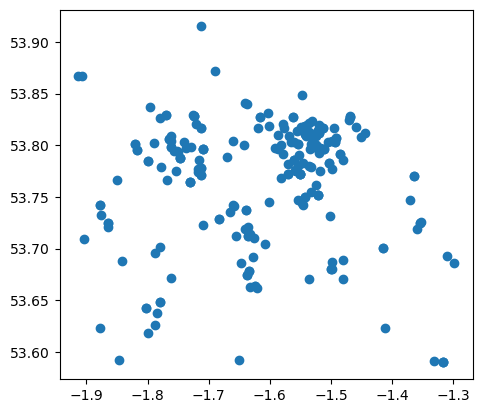

In [12]:
wys_charity = wys_charity.set_crs(4326)
wys_charity.plot()

In [13]:
origins = wys_oapwc[['OA21CD', 'geometry']]
origins = origins.rename(columns={"OA21CD": "id"})
origins = origins.to_crs(wys_charity.crs)

<Axes: >

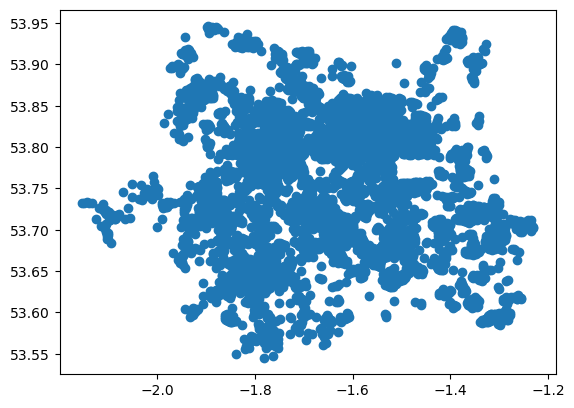

In [14]:
origins.plot()

<Axes: >

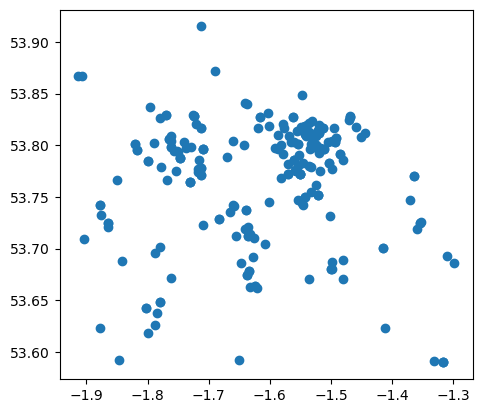

In [15]:
destinations = wys_charity[['member_id', 'Coordinates']]
destinations = destinations.rename(columns={"member_id": "id", "Coordinates": "geometry"})
destinations = destinations.set_geometry("geometry")
destinations.head()
destinations.plot()

In [16]:
import sys
sys.argv.append(["--max-memory", "12G"]) #override ram limitation for r5py computations
import r5py
from r5py import TransportNetwork

#### Walking only

In [17]:
#adding OSM road network and GTFS feed to the transport network variable
road_network = '1_raw data\Transport Network\West_Yorkshire_Road_Network.osm.pbf'
transport_network = TransportNetwork(road_network)

In [18]:
import datetime
from r5py import TravelTimeMatrixComputer, TransportMode

travel_time_matrix_computer = TravelTimeMatrixComputer(
    transport_network,
    origins = origins,
    destinations=destinations,
    snap_to_network = True,
    transport_modes=[TransportMode.WALK],
    max_time=datetime.timedelta(seconds=1800)
)
access_t_walking = travel_time_matrix_computer.compute_travel_times()

access_t_walking = access_t_walking.dropna() #drop rows with NaN travel time
access_t_walking.head()

,from_id,to_id,travel_time
16388,E00060205,119,29.0
16629,E00060227,119,21.0
16870,E00060228,119,23.0
17834,E00060007,119,28.0
18075,E00060005,119,23.0


In [19]:
access_t_walking.to_csv('2_processed data\OD travel time\OD_travel_time_walking.csv', index=False)

#### Driving (Does not account for traffic)

In [38]:
#adding OSM road network and GTFS feed to the transport network variable
road_netowrk = '1_raw data\Transport Network\West_Yorkshire_Road_Network.osm.pbf'
transport_network = TransportNetwork(road_netowrk,)

In [39]:
travel_time_matrix_computer = TravelTimeMatrixComputer(
    transport_network,
    origins = origins,
    destinations=destinations,
    snap_to_network = True,
    transport_modes=[TransportMode.CAR],
    max_time=datetime.timedelta(seconds=1800)
    
)
access_t_driving = travel_time_matrix_computer.compute_travel_times()

access_t_driving = access_t_driving.dropna() #drop rows with NaN travel time
access_t_driving.head()

,from_id,to_id,travel_time
0,E00059464,119,19.0
2,E00059464,122,29.0
12,E00059464,946,21.0
17,E00059464,977,11.0
18,E00059464,983,25.0


In [40]:
access_t_driving.to_csv('2_processed data\OD travel time\OD_travel_time_driving.csv', index=False)

#### Multimodal travel (Public Transport + Walking)

In [20]:
#adding OSM road network and GTFS feed to the transport network variable
road_network = '1_raw data\Transport Network\West_Yorkshire_Road_Network.osm.pbf'
public_transport = '1_raw data\Transport Network\improved-gtfs-yorkshire-dft.zip'
transport_network = TransportNetwork(road_network, [public_transport],)

In [21]:
import datetime
from r5py import TravelTimeMatrixComputer, TransportMode

travel_time_matrix_computer = TravelTimeMatrixComputer(
    transport_network,
    origins = origins,
    destinations=destinations,
    departure=datetime.datetime(2024, 8, 5, 9, 30),
    departure_time_window=datetime.timedelta(seconds=1800),
    snap_to_network = True,
    transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
    max_time_walking=datetime.timedelta(seconds=1800),
    max_time=datetime.timedelta(seconds=3600)
)
access_t_multimodal = travel_time_matrix_computer.compute_travel_times()

access_t_multimodal = access_t_multimodal.dropna() #drop rows with NaN travel time
access_t_multimodal.head()

,from_id,to_id,travel_time
184,E00059464,10032,30.0
226,E00059464,11994,59.0
241,E00059837,119,50.0
258,E00059837,977,35.0
287,E00059837,3600,59.0


In [22]:
access_t_multimodal.to_csv('2_processed data\OD travel time\OD_travel_time_multimodal_v2.csv', index=False)

## Travel time to Non FS charities

In [17]:
givefood_foodbanks = gpd.read_file('1_raw data\Givefood_Data\givefood_foodbanks_05_09_2024.geojson')[['name', 'network', 'geometry']]
givefood_locations = gpd.read_file('1_raw data\Givefood_Data\givefood_locations_05_09_2024.geojson')[['name', 'network', 'geometry']]
nonFS_charity = pd.concat([givefood_foodbanks, givefood_locations])
nonFS_charity.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2785 entries, 0 to 1857
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      2785 non-null   object  
 1   slug      2785 non-null   object  
 2   network   2780 non-null   object  
 3   geometry  2785 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 108.8+ KB


<Axes: >

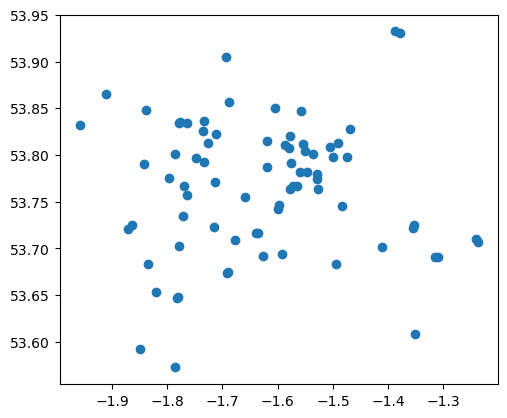

In [18]:
wys_bound_clip = wys_bound.to_crs(4326)
nonFS_charity = nonFS_charity.set_crs(4326)
wys_nonFS_charity = gpd.clip(nonFS_charity, wys_bound_clip)

wys_nonFS_charity.plot()

In [33]:
origins = wys_oapwc[['OA21CD', 'geometry']]
origins = origins.rename(columns={"OA21CD": "id"})
origins = origins.to_crs(wys_nonFS_charity.crs)

In [26]:
wys_nonFS_charity.head()

,name,slug,network,geometry
436,Holme Valley,holme-valley,Independent,POINT (-1.78595 53.57263)
536,Fusion,fusion,IFAN,POINT (-1.78217 53.64733)
123,Huddersfield,huddersfield,Independent,POINT (-1.78062 53.64839)
135,Mirfield,mirfield,Independent,POINT (-1.69206 53.67376)
109,"Mirfield, Salvation Army",mirfield,Independent,POINT (-1.69075 53.67428)


In [34]:
destinations_nonFS = wys_nonFS_charity[['name', 'geometry']]
destinations_nonFS.insert(1, 'id', range(1, 1 + len(destinations_nonFS)))
destinations_nonFS['id'] = ('non_FS_' + destinations_nonFS['id'].apply(str))
destinations_nonFS

,name,id,geometry
436,Holme Valley,non_FS_1,POINT (-1.78595 53.57263)
536,Fusion,non_FS_2,POINT (-1.78217 53.64733)
123,Huddersfield,non_FS_3,POINT (-1.78062 53.64839)
135,Mirfield,non_FS_4,POINT (-1.69206 53.67376)
109,"Mirfield, Salvation Army",non_FS_5,POINT (-1.69075 53.67428)
...,...,...,...
1407,"St Cyprians, Leeds South & East Food Bank",non_FS_73,POINT (-1.50616 53.80877)
577,"Gipton, Leeds South & East Food Bank",non_FS_74,POINT (-1.49171 53.81298)
524,"Seacroft, Leeds South & East Food Bank",non_FS_75,POINT (-1.46972 53.82749)
1572,"Wetherby, Salvation Army",non_FS_76,POINT (-1.37886 53.93102)


In [31]:
import sys
sys.argv.append(["--max-memory", "12G"]) #override ram limitation for r5py computations
import r5py
from r5py import TransportNetwork

#### Walking only

In [32]:
#adding OSM road network and GTFS feed to the transport network variable
road_network = '1_raw data\Transport Network\West_Yorkshire_Road_Network.osm.pbf'
transport_network = TransportNetwork(road_network)

In [35]:
import datetime
from r5py import TravelTimeMatrixComputer, TransportMode

travel_time_matrix_computer = TravelTimeMatrixComputer(
    transport_network,
    origins = origins,
    destinations=destinations_nonFS,
    snap_to_network = True,
    transport_modes=[TransportMode.WALK],
    max_time=datetime.timedelta(seconds=1800)
)
access_t_walking = travel_time_matrix_computer.compute_travel_times()

access_t_walking = access_t_walking.dropna() #drop rows with NaN travel time
access_t_walking.head()

,from_id,to_id,travel_time
132,E00059837,non_FS_56,8.0
209,E00059455,non_FS_56,9.0
286,E00059456,non_FS_56,2.0
363,E00059836,non_FS_56,11.0
440,E00059835,non_FS_56,12.0


In [36]:
access_t_walking.to_csv('2_processed data\OD travel time\OD_travel_time_walking_nonFS.csv', index=False)

#### Multimodal travel (Public Transport + Walking)

In [39]:
#adding OSM road network and GTFS feed to the transport network variable
road_network = '1_raw data\Transport Network\West_Yorkshire_Road_Network.osm.pbf'
public_transport = '1_raw data\Transport Network\improved-gtfs-yorkshire-dft.zip'
transport_network = TransportNetwork(road_network, [public_transport],)

In [40]:
import datetime
from r5py import TravelTimeMatrixComputer, TransportMode

travel_time_matrix_computer = TravelTimeMatrixComputer(
    transport_network,
    origins = origins,
    destinations=destinations_nonFS,
    departure=datetime.datetime(2024, 8, 5, 9, 30),
    departure_time_window=datetime.timedelta(seconds=1800),
    snap_to_network = True,
    transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
    max_time_walking=datetime.timedelta(seconds=1800),
    max_time=datetime.timedelta(seconds=3600)
)
access_t_multimodal = travel_time_matrix_computer.compute_travel_times()

access_t_multimodal = access_t_multimodal.dropna() #drop rows with NaN travel time
access_t_multimodal.head()

,from_id,to_id,travel_time
55,E00059464,non_FS_56,39.0
132,E00059837,non_FS_56,8.0
134,E00059837,non_FS_58,56.0
137,E00059837,non_FS_61,55.0
209,E00059455,non_FS_56,9.0


In [41]:
access_t_multimodal.to_csv('2_processed data\OD travel time\OD_travel_time_multimodal_nonFS.csv', index=False)